# DNN-MID-TERM-PROJECT
**Author: Aaryan Kurade**<br>
**PRN No: 1032222016**<br>
**Date: 21/03/2024**<br>

**Topic: Healthcare**<br>
**Problem Statement: Detection of anomalies in medical images (e.g., X-rays, MRIs)**<br>
**Selected Pre-trained Model: AlexNet**<br>
**Dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data**<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_path = 'C:\\Users\\Aaryan\\Videos\\ML projects\\Chest X-Ray\\chest_xray\\train'
test_path = 'C:\\Users\\Aaryan\\Videos\\ML projects\\Chest X-Ray\\chest_xray\\test'
val_path = 'C:\\Users\\Aaryan\\Videos\\ML projects\\Chest X-Ray\\chest_xray\\val'

In [3]:
# Preprocessing the data
img_height,img_width = 224,224

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height,img_width),
    batch_size=32,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height,img_width),
    batch_size=32,
    class_mode="binary"
)

val_data = test_datagen.flow_from_directory(
    val_path,
    target_size=(img_height,img_width),
    batch_size=32,
    class_mode="binary"
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


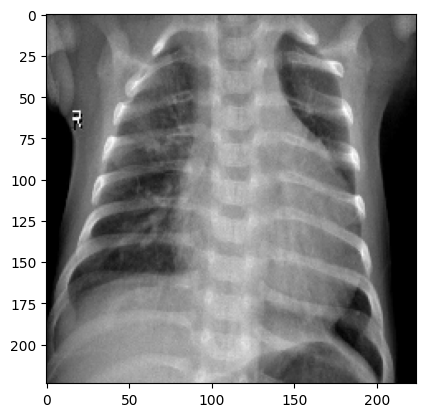

In [4]:
plt.imshow(train_data[0][0][0]) 

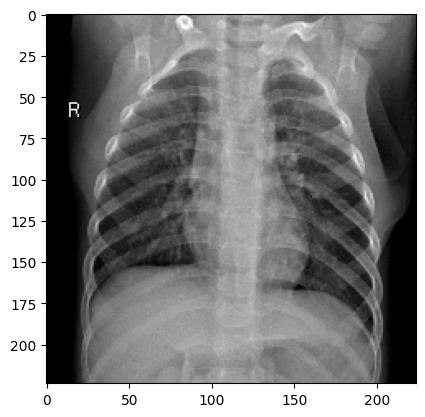

In [5]:
plt.imshow(train_data[1][0][0]) 

In [6]:
labels = ['PNEUMONIA', 'NORMAL']

In [7]:
from tensorflow.keras import layers, models

In [8]:
# Build the model
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

def AlexNet(input_shape=(224,224,3)):
    model =Sequential()
    model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))

    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))

    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(9216, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

In [9]:
model = AlexNet()
model.summary()

C:\Users\Aaryan\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9216)           │    58,991,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,277,057 (447.38 MB)

 Trainable params: 117,277,057 (447.38 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=10,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/10


C:\Users\Aaryan\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.7196 - loss: 0.9338 - val_accuracy: 0.5000 - val_loss: 0.7696
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.7408 - loss: 0.5784 - val_accuracy: 0.5000 - val_loss: 0.7982
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.7401 - loss: 0.5762 - val_accuracy: 0.5000 - val_loss: 0.8425
Epoch 4/10
 63/163 ━━━━━━━━━━━━━━━━━━━━ 2:47 2s/step - accuracy: 0.7314 - loss: 0.5809

KeyboardInterrupt: 

**Epoch 4/10 had: Accuracy: 0.9676 - Loss: 0.1041 - Val_Accuracy: 1.0000 - Val_Loss: 0.0217 <br>
This is the best model so far.<br>
It achieved an accuracy of 97.76% and a loss of 0.1041. <br>
It's validation accuracy is 100% and validation loss is 0.0217.** <br>

In [ ]:
# Evaluate the model on the test data
loss = model.evaluate(test_data, y_pred)[0]
accuracy = model.evaluate(test_data, y_pred)[1] * 100

# Display the loss and accuracy
print("Loss of the model is -", loss)
print("Accuracy of the model is -", accuracy, "%")

In [ ]:
# Visualize Training and Validation Loss
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Evaluate on Validation Set
model.evaluate(val_data)

In [ ]:
# Visualize Training and Validation Accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
# Predict classes on test data
predictions = model.predict(test_data)
predictions = np.round(predictions).astype(int)
predictions = predictions.reshape(1, -1)[0]

# Display some of the predicted classes
print("Predicted Classes for the First 15 Samples:")
print(predictions[:15])

In [ ]:
# Performance Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
predictions = model.predict(test_data)
y_pred = np.round(predictions).astype(int)
y_true = test_data.classes

In [ ]:
# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

In [ ]:
# Anomaly Detection
# Set a threshold to classify anomalies based on model predictions
threshold = 0.5 
anomalies = (predictions > threshold).astype(int)  # Convert probabilities to binary labels

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1']) # labels for rows and columns are 0 and 1.

In [ ]:
# Confusion matrix
labels = ['PNEUMONIA', 'NORMAL']
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
## Find indices of correctly and incorrectly predicted classes
correct_indices = np.nonzero(np.round(predictions) == y_true)[0]
incorrect_indices = np.nonzero(np.round(predictions) != y_true)[0]

print("Number of Correct Predictions:", len(correct_indices)) # Number of correct predictions
print("Number of Incorrect Predictions:", len(incorrect_indices)) # Number of incorrect predictions

In [ ]:
# Visualize correct predictions
print("Some of the Correctly Predicted Classes:")
plt.figure(figsize=(10, 10))
for i, c in enumerate(correct_indices[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[c][0][0], cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(np.round(predictions[c]), y_true[c]))
plt.tight_layout()
plt.show()

In [ ]:
# Visualize some incorrectly predicted classes
print("Some of the Incorrectly Predicted Classes:")
plt.figure(figsize=(10, 10))
for i, c in enumerate(incorrect[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[c][0][0], cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(np.round(predictions[c]), y_true[c]))
    plt.tight_layout()

plt.show()

In [ ]:
# 4. Deployment
# If you want to deploy the model, you can save it for future use
model.save("anomaly_detection_model.h5")

# Conclusion
In this project, we aimed to address the problem of detecting anomalies in medical images, specifically X-rays, using the AlexNet pre-trained model. We leveraged deep learning techniques to train the model on a dataset containing both normal and abnormal X-ray images. After preprocessing the data and training the model, we evaluated its performance on a separate test set.

Our evaluation included metrics such as accuracy, loss, precision, recall, and F1-score, providing insights into the model's ability to correctly classify normal and abnormal X-ray images. Additionally, we visualized some of the correctly and incorrectly predicted classes to gain further understanding of the model's performance.

Overall, our project demonstrates the potential of deep learning models, particularly convolutional neural networks like AlexNet, in aiding medical diagnosis through the automated detection of anomalies in medical images. While the model shows promising results, further refinement and validation in clinical settings would be necessary before real-world deployment.

# AlexNet Model Architecture :
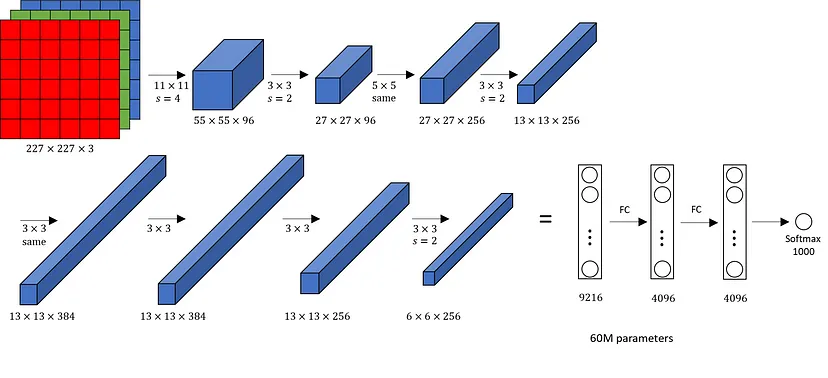

This was the first architecture that used GPU to boost the training performance. AlexNet consists of 5 convolution layers, 3 max-pooling layers, 2 Normalized layers, 2 fully connected layers and 1 SoftMax layer. Each convolution layer consists of a convolution filter and a non-linear activation function called “ReLU”. The pooling layers are used to perform the max-pooling function and the input size is fixed due to the presence of fully connected layers. The input size is mentioned at most of the places as 224x224x3 but due to some padding which happens it works out to be 227x227x3. Above all this AlexNet has over 60 million parameters.

**Key Features:**<br>
‘ReLU’ is used as an activation function rather than ‘tanh’ <br>
Batch size of 128 is used for training i.e. 128 images are processed at a time.<br>
SGD Momentum is used as a learning algorithm <br>
Data Augmentation is been carried out like flipping, jittering, cropping, colour normalization, etc. <br>

## Max Pooling Layer :
Max Pooling is a feature commonly imbibed into Convolutional Neural Network (CNN) architectures. The main idea behind a pooling layer is to “accumulate” features from maps generated by convolving a filter over an image. Formally, its function is to progressively reduce the spatial size of the representation to reduce the number of parameters and computations in the network. The most common form of pooling is max pooling.
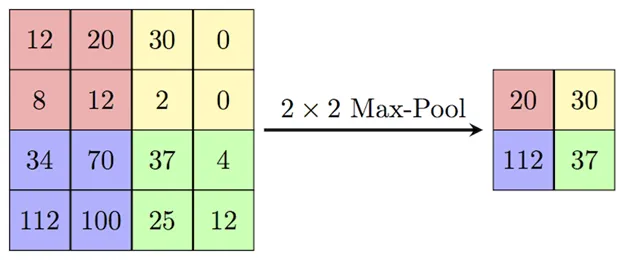
Max pooling is done in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation. Max pooling is done by applying a max filter to (usually) non-overlapping sub-regions of the initial representation.

## Dropout :
A neuron is removed from the neural network during dropout with a probability of 0.5. A neuron that is dropped does not make any contribution to either forward or backward propagation. As seen in the graphic below, each input is processed by a separate Neural Network design. The acquired weight parameters are therefore more reliable and less prone to overfitting.
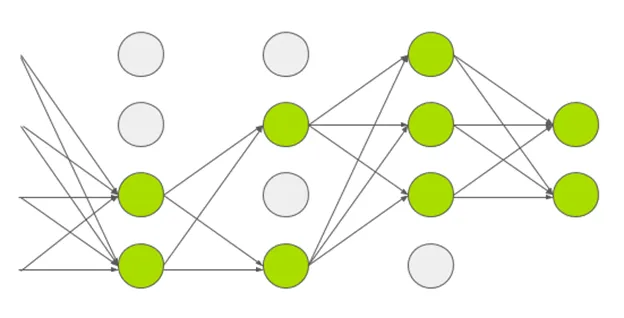

# AlexNet Summary :
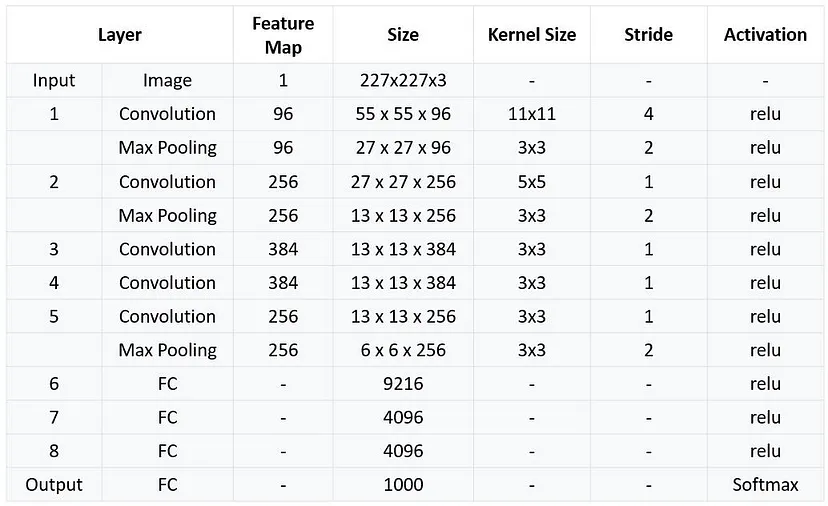

## References :
1) Research Paper : https://www.sciencedirect.com/science/article/abs/pii/S1361841517301135
2) AlexNet Architecture : https://medium.com/@siddheshb008/alexnet-architecture-explained-b6240c528bd5